In [5]:
import matplotlib.pyplot as plt
from skimage.restoration import unwrap_phase

In [6]:
import numpy as np
from scipy.optimize import minimize

def phase_diff_fun(original, shifted):
    def fun(x):
        X_coef, Y_coef, constant = x
        XX, YY = np.meshgrid(np.arange(original.shape[0]), np.arange(original.shape[1]))
        return np.sum((np.abs(original - (shifted - (X_coef * XX + Y_coef * YY + constant))))**2) / np.sum(np.abs(np.angle(original))**2)
    return fun

def phase_linear_fit(original, shifted):
    fun = phase_diff_fun(original, shifted)
    res = minimize(fun, [1, 1, 0])
    X_coef, Y_coef, constant = res.x
    XX, YY = np.meshgrid(np.arange(original.shape[0]), np.arange(original.shape[1]))
    return (shifted - (X_coef * XX + Y_coef * YY + constant)), res

Without padding.

In [2]:
import numpy as np
from skimage.restoration import unwrap_phase

sampling = 0.2 # Angstrom

input_phase_raw = np.load("../../object_phase.npy")
output_phase = np.angle(np.load("final_trans_rot.npy"))
#output_phase = np.angle(np.load("final_trans_rot_0100.npy"))
# output_phase = np.angle(np.load("final_trans_rot_0200.npy"))
output_phase = unwrap_phase(output_phase - 2.4)

# output_phase is shifted by pi
#                              shift   (shift to (0, 2*np.pi))
# output_phase = (output_phase - 2.56+ np.pi) % (2*np.pi) - np.pi
# output_phase[output_phase > np.pi] -= 2 * np.pi
# output_phase[output_phase <= -np.pi] += 2 * np.pi

V1, V2 = 178, 178

# -1 is optional
input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1), (244 - V2):(244 + 356 - V2)]
# input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1 -1), (244 - V2):(244 + 356 - V2 -1)]

print("input_phase: shape ", input_phase.shape)
print("output_phase: shape ", output_phase.shape)

input_phase: shape  (356, 356)
output_phase: shape  (710, 710)


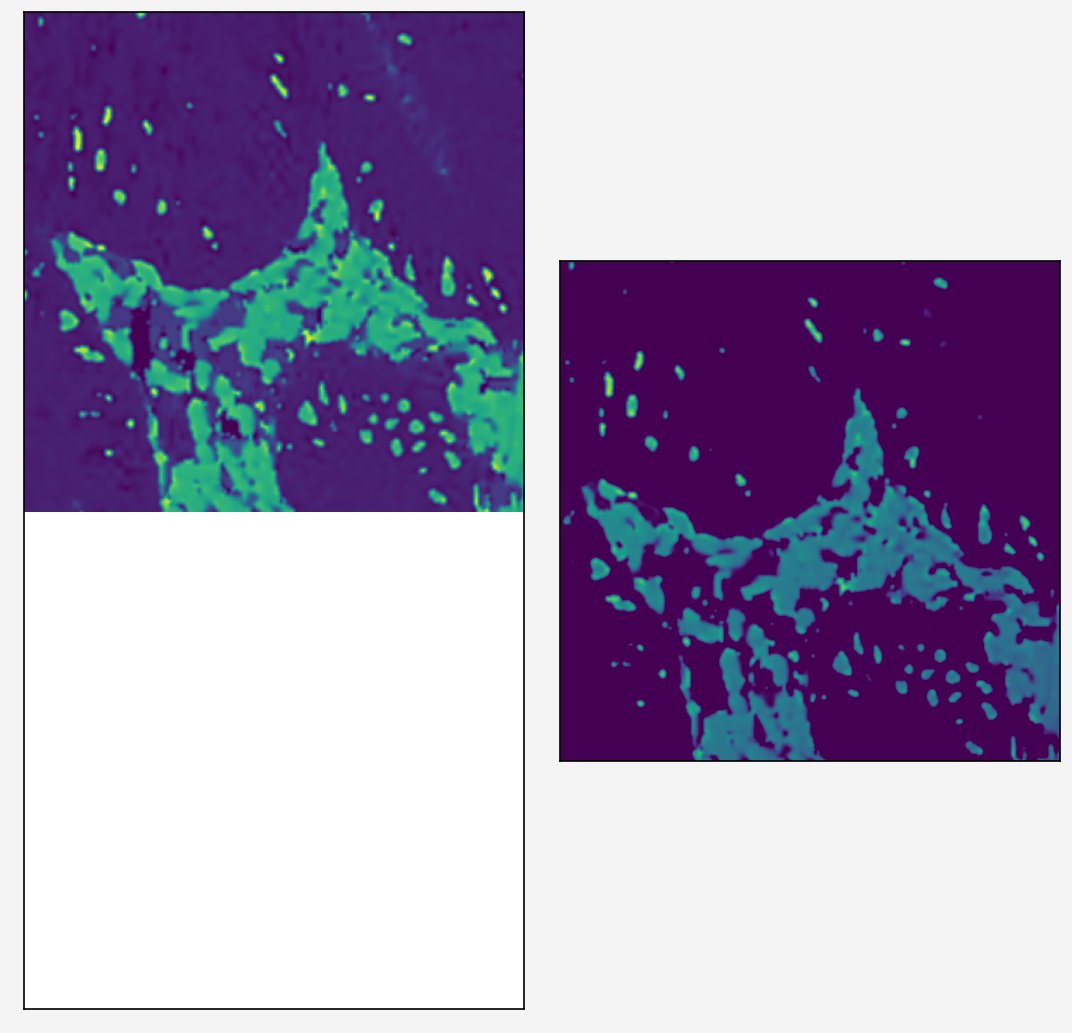

In [3]:
import proplot as pplt

fig = pplt.figure()
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax1.format(xticks=[], yticks=[])
ax2 = fig.subplot(122)
ax2.imshow(output_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax2.format(xticks=[], yticks=[])

In [4]:
from scipy import signal
cross_correlation = signal.correlate(input_phase, output_phase, mode="same")
plt.imshow(cross_correlation)
plt.colorbar()
[signal.find_peaks(cross_correlation[i,:], height=85000) for i in range(cross_correlation.shape[0])][175:185]
# signal.find_peaks(cross_correlation[:,179])
# peak = (179, 178) # thus the image is shift by 2 pixels in x axis

NameError: name 'plt' is not defined

In [42]:
V1, V2 = peak

# -1 is optional
input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1), (244 - V2):(244 + 356 - V2)]
# input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1 -1), (244 - V2):(244 + 356 - V2 -1)]

np.sum(np.abs(output_phase - input_phase)**2)/np.sum(np.abs(input_phase)**2)

0.424147093251961

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.01329298245147498
        x: [-8.003e-04 -1.945e-03 -1.610e-01]
      nit: 7
      jac: [-1.164e-10 -2.328e-10 -3.492e-10]
 hess_inv: [[ 3.891e-04  5.020e-11 -6.907e-02]
            [ 5.020e-11  3.891e-04 -6.907e-02]
            [-6.907e-02 -6.907e-02  2.863e+01]]
     nfev: 40
     njev: 10


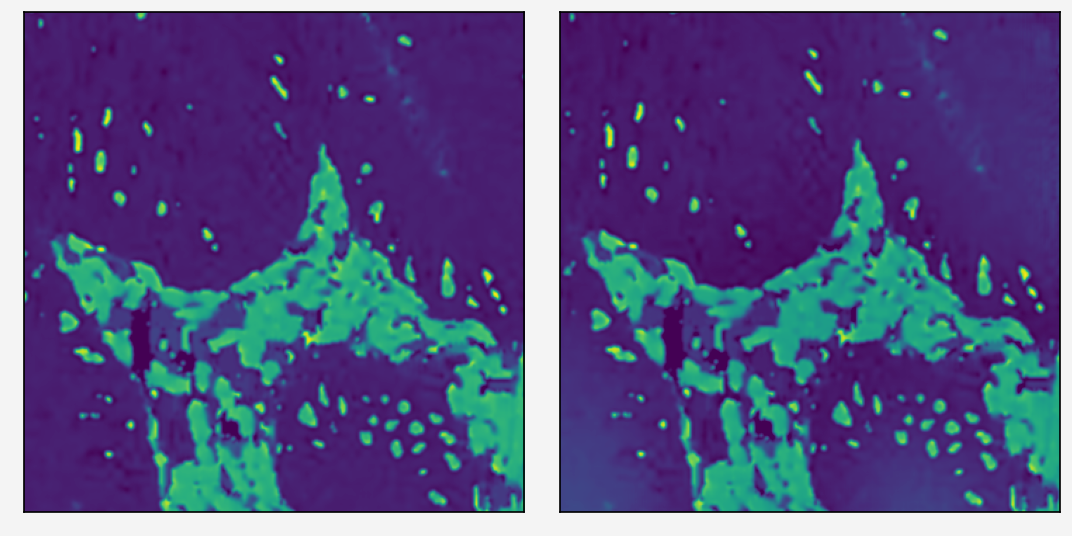

In [47]:
corrected, res = phase_linear_fit(original=input_phase, shifted=output_phase)
print(res)

import proplot as pplt

fig = pplt.figure()
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax1.format(xticks=[], yticks=[])
ax2 = fig.subplot(122)
ax2.imshow(corrected, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax2.format(xticks=[], yticks=[])

In [38]:
65266.724111780924 / np.sum(np.angle(input_phase))

0.19684521057049312

padding factor = 2.

In [7]:
import numpy as np
sampling = 0.2 # Angstrom

input_phase_raw = np.load("../../object_phase.npy")
output_phase = np.angle(np.load("final_trans_rot.npy"))
# output_phase = np.angle(np.load("final_trans_rot_0100.npy"))
# output_phase = np.angle(np.load("final_trans_rot_0200.npy"))
output_phase = unwrap_phase(output_phase[::2,::2] - 1.8)

# output_phase is shifted by pi
#                              shift   (shift to (0, 2*np.pi))
# output_phase = (output_phase - 2.58 + np.pi) % (2*np.pi) - np.pi
# output_phase[output_phase > np.pi] -= 2 * np.pi
# output_phase[output_phase <= -np.pi] += 2 * np.pi

V1, V2 = 178, 178
#V1, V2 = peak

input_phase = input_phase_raw[(245 - V1):(245 + 355 - V1), (245 - V2):(245 + 355 - V2)]

print("input_phase: shape ", input_phase.shape)
print("output_phase: shape ", output_phase.shape)

input_phase: shape  (355, 355)
output_phase: shape  (355, 355)


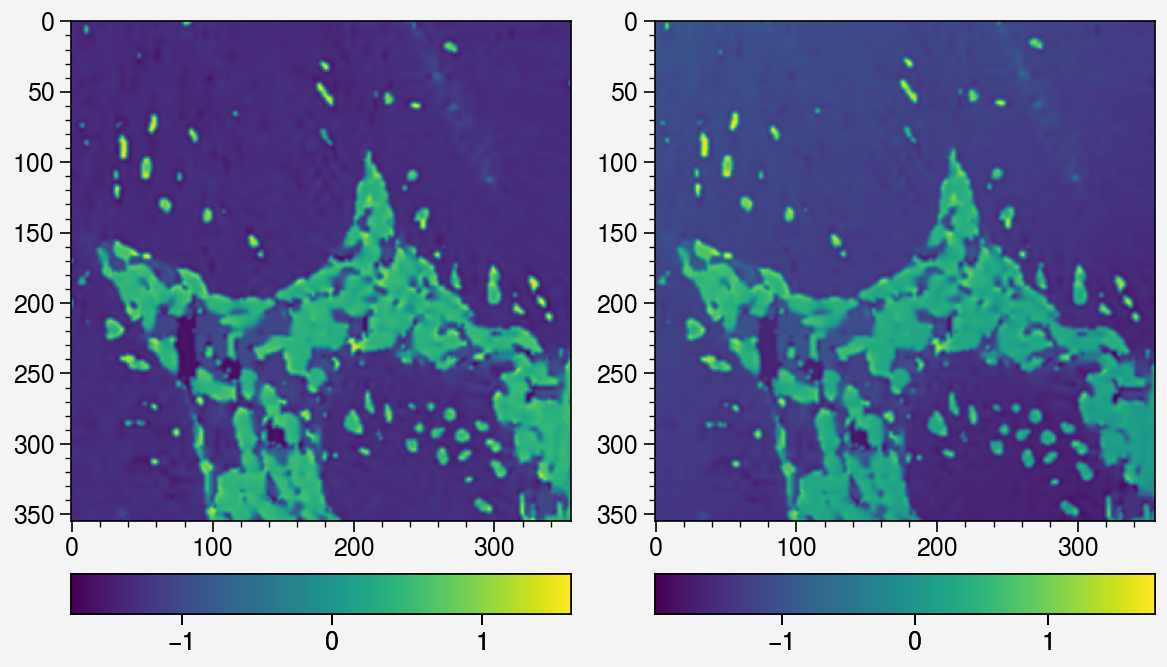

In [8]:
import proplot as pplt

fig = pplt.figure(share=False)
ax1 = fig.subplot(121)
m = ax1.imshow(input_phase, cyclic=True, cmap="viridis")
ax1.colorbar(m, loc="b")
ax2 = fig.subplot(122)
m = ax2.imshow(output_phase, cyclic=True, cmap="viridis")
ax2.colorbar(m, loc="b")

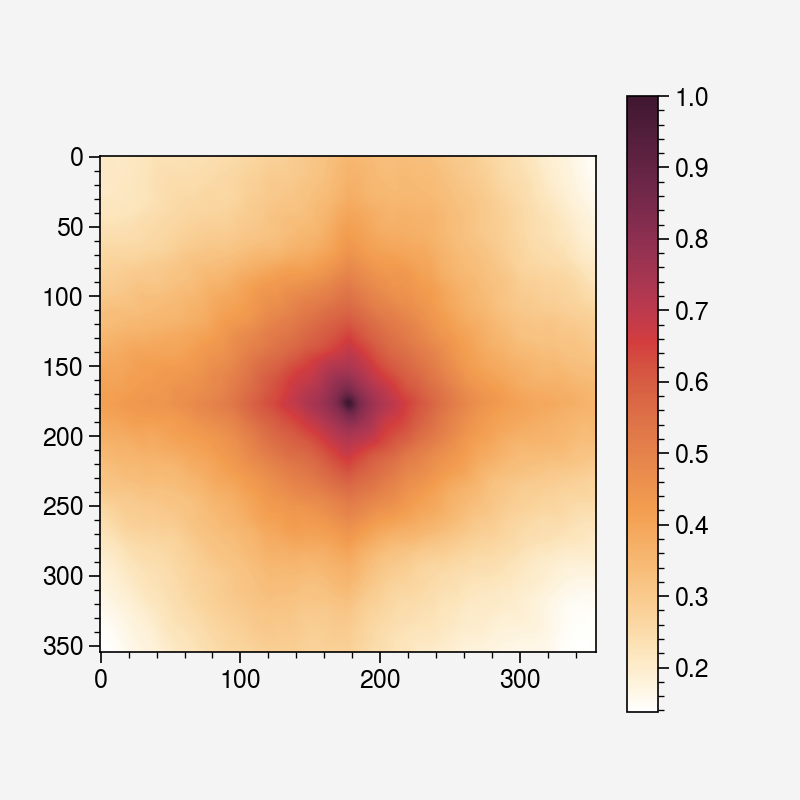

In [12]:
from scipy import signal
cross_correlation = signal.correlate(input_phase, output_phase, mode="same")
cross_correlation /= cross_correlation.max()
plt.imshow(cross_correlation)
plt.colorbar()
[signal.find_peaks(cross_correlation[i,:], height=0.9) for i in range(cross_correlation.shape[0])][170:190]
signal.find_peaks(cross_correlation[:,177])
peak = (177, 177) # thus the image is shift by 2 pixels in x axis

In [13]:
V1, V2 = peak

# -1 is optional
# input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1), (244 - V2):(244 + 356 - V2)]
input_phase = input_phase_raw[(244 - V1):(244 + 356 - V1 -1), (244 - V2):(244 + 356 - V2 -1)]

np.sum(np.abs(output_phase - input_phase)**2)/np.sum(np.abs(input_phase)**2)

0.0672552563394936

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.008223849503010451
        x: [-9.499e-04 -1.160e-03  3.649e-01]
      nit: 8
      jac: [-4.005e-08 -5.041e-08 -2.328e-10]
 hess_inv: [[ 3.906e-04 -5.112e-08 -6.913e-02]
            [-5.112e-08  3.902e-04 -6.913e-02]
            [-6.913e-02 -6.913e-02  2.858e+01]]
     nfev: 44
     njev: 11


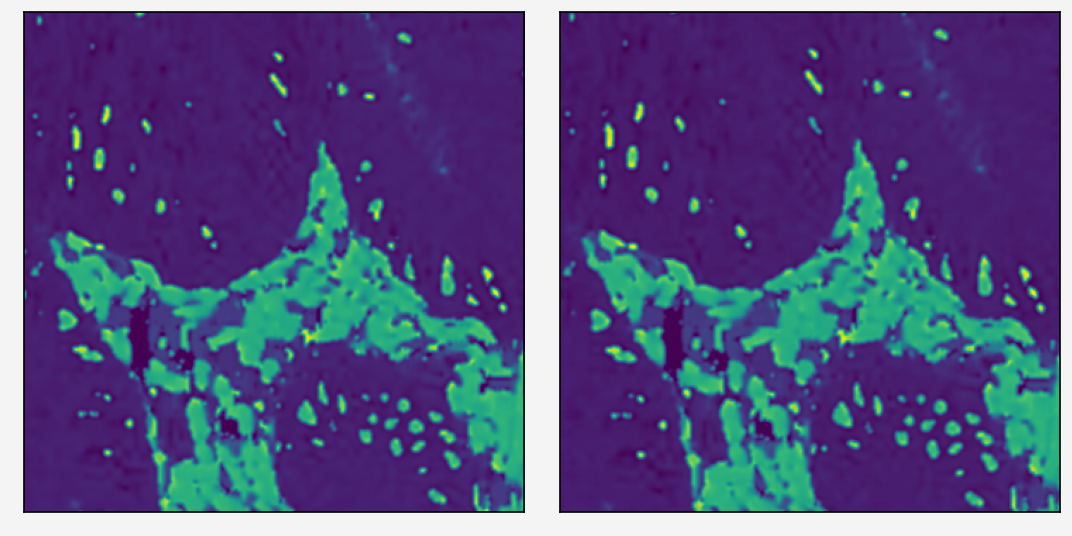

In [14]:
corrected, res = phase_linear_fit(original=input_phase, shifted=output_phase)
print(res)

import proplot as pplt

fig = pplt.figure()
ax1 = fig.subplot(121)
ax1.imshow(input_phase, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax1.format(xticks=[], yticks=[])
ax2 = fig.subplot(122)
ax2.imshow(corrected, vmin=-np.pi/2, vmax=np.pi/2, cyclic=True, cmap="viridis")
ax2.format(xticks=[], yticks=[])

In [15]:
np.save("corrected_phase", corrected)